# IR Signal processing

Ich hab schon einiges rausgefunden, das processing der signale sollte klappen.
Ich hab auch schon geguckt ob das rust program parallel den einen port auslesen kann, während pi-blaster läuft. das geht auch.  Sehr nice.

Alles geht, jetzt muss es nur noch umgesetzt werden!

In [169]:
import matplotlib.pyplot as plt
from collections import Counter

In [56]:
def read_file(filename="output.txt"):
    with open(filename) as f:
        content = f.read()
    lines = content.strip().split("\n")
    res = [l.split() for l in lines]
    res = [(int(l[0]), int(l[1])) for l in res]
    return res

In [164]:
def binner(v):
    if 0 < v < 1000:
        return 1
    if 1000 < v < 2000:
        return 2
    if 2000 < v < 5000:
        return 3
    if 20000 < v < 50000:
        return 4
    if 90000 < v < 100000:
        return 5
    return 0

def splitter(vs):
    lists = []
    cur_list = []
    for v in vs:
        if v == 0:
            lists.append(cur_list)
            cur_list = []
        else:
            cur_list.append(v)
    return lists

def clean_seq(seq):
    return list([v for v in seq if v < 3])

In [185]:
res = read_file("output_all_44_2.txt")
durs0 = [i[1] for i in res if i[0] == 0]
durs1 = [i[1] for i in res if i[0] == 1]
full_seq = [binner(i[1]) for i in res if i[0] == 1]
seqs = list([clean_seq(s) for s in splitter(seq)])
seqs = list([s for s in seqs if len(s) > 0])
seqs32 = list([s for s in seqs if len(s) == 32])

In [182]:
len(seqs)

87

In [134]:
durs1

[3800402,
 4394,
 425,
 423,
 613,
 422,
 433,
 419,
 613,
 426,
 1735,
 1569,
 1734,
 1728,
 1547,
 1729,
 1549,
 1750,
 607,
 618,
 613,
 608,
 434,
 424,
 1734,
 422,
 1734,
 1549,
 1739,
 1546,
 1549,
 1727,
 423,
 1772,
 39649,
 2343,
 5327943,
 4554,
 421,
 606,
 417,
 454,
 637,
 451,
 430,
 614,
 1538,
 1717,
 1545,
 1717,
 1543,
 1723,
 1542,
 1535,
 424,
 606,
 418,
 605,
 418,
 614,
 1552,
 610,
 1560,
 1533,
 1739,
 1537,
 1726,
 1537,
 608,
 1731,
 39749,
 2141,
 4600097,
 4383,
 614,
 423,
 611,
 425,
 612,
 424,
 613,
 431,
 1753,
 1547,
 1728,
 1548,
 1557,
 1736,
 1547,
 1738,
 423,
 613,
 612,
 612,
 422,
 610,
 1551,
 613,
 1551,
 1626,
 1738,
 1549,
 1544,
 1761,
 431,
 1738,
 39536,
 2310,
 4281972,
 4397,
 619,
 610,
 607,
 424,
 607,
 431,
 610,
 424,
 1567,
 1549,
 1539,
 1743,
 1549,
 1551,
 1729,
 1611,
 633,
 443,
 435,
 644,
 437,
 435,
 1571,
 641,
 1570,
 1592,
 1572,
 1569,
 1608,
 1579,
 465,
 1576,
 4188948,
 4390,
 427,
 614,
 421,
 611,
 423,
 614,
 4

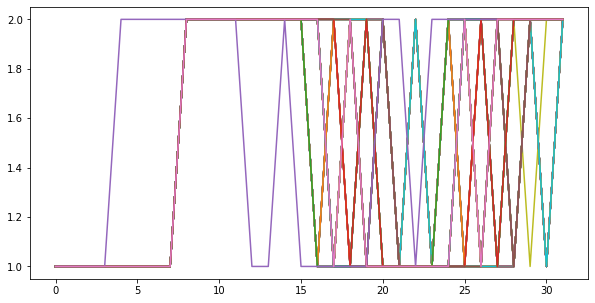

In [183]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
for seq in seqs:
    ax.plot(seq)

#ax.set_xlim((0, 200))

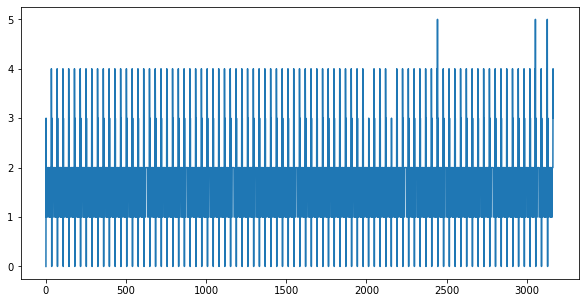

In [186]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(full_seq)

#ax.set_xlim((0, 200))

In [174]:
lens = Counter([len(s) for s in seqs])
lens

Counter({32: 42, 30: 1})

In [127]:
def gen_dots(tuples):
    dots = []
    dots.append((0, 0))
    total_dur = 0
    for val, dur in tuples:
        dots.append((total_dur + dur - 1, val))
        dots.append((total_dur + dur, ((val + 1) % 2)))
        total_dur += dur
    return dots